In [56]:
# Full name: Mai Xuan Bach
# ID: 11200480

In [57]:
import numpy as np

In [58]:
import pandas as pd

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
class LinearRegressionLR:
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        '''Fit the linear regression model
        X: A matrix whose columns are the independent variables
        Y: A/an matrix/array, which is the dependent variable
        '''
        
        # Add an only-ones-column to X
        self._original_X = X
        self._X = np.insert(X, 0, [1] * X.shape[0], axis = 1)
        
        # Reshape Y to the right shape
        self._Y = np.array(Y).reshape(-1, 1)
        
        # Compute W
        self._W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(self._X), self._X)), np.transpose(self._X)), self._Y)
        
    def coef(self):
        "Return the coefficients (matrix W)"
        return self._W
    
    def plot_model(self):
        "Plot model only for simple linear regression"
        # reshape(-1) is a line vector, when reshape(-1,1) is a column
        # to plot, X have to be array to be the same size as Y:
        self._original_X_plot = np.asarray(self._original_X).reshape(-1)
        
        # if not simple LR, could not plot
        if self._original_X.shape[1] != 1:
            raise Exception("This method is only used for simple LR.")
        
        y_pred = self.predict(np.array(self._original_X))
        
        plt.scatter(self._original_X_plot, self._Y, color ='g')
        plt.plot(self._original_X_plot, y_pred, color ='k')
  
        plt.show()
    
    def predict(self, new_X):
        """Predict new value
        new_X: A new matrix of X to predict new Y"""
        
        # Add an only-ones-column to X
        new_X = np.insert(new_X, 0, new_X.shape[1], axis = 1)
        return np.matmul(new_X, self._W)
    
        

### Ex2. 
Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv.
1.	Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter).
2.	Dự đoán giá các căn nhà có diện tích 50, 100, 150.


In [61]:
data = pd.read_csv("data_linear.csv")

In [62]:
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [63]:
data["Diện tích"]

0      30.0000
1      32.4138
2      34.8276
3      37.2414
4      39.6552
5      42.0690
6      44.4828
7      46.8966
8      49.3103
9      51.7241
10     54.1379
11     56.5517
12     58.9655
13     61.3793
14     63.7931
15     66.2069
16     68.6207
17     71.0345
18     73.4483
19     75.8621
20     78.2759
21     80.6897
22     83.1034
23     85.5172
24     87.9310
25     90.3448
26     92.7586
27     95.1724
28     97.5862
29    100.0000
Name: Diện tích, dtype: float64

In [64]:
data["Giá"]

0      448.524
1      509.248
2      535.104
3      551.432
4      623.418
5      625.992
6      655.248
7      701.377
8      748.918
9      757.881
10     831.004
11     855.409
12     866.707
13     902.545
14     952.261
15     995.531
16    1069.780
17    1074.420
18    1103.880
19    1138.690
20    1153.130
21    1240.270
22    1251.900
23    1287.970
24    1320.470
25    1374.920
26    1410.160
27    1469.690
28    1478.540
29    1515.280
Name: Giá, dtype: float64

In [65]:
X = np.transpose(np.matrix(np.array(data['Diện tích'])))
X

matrix([[ 30.    ],
        [ 32.4138],
        [ 34.8276],
        [ 37.2414],
        [ 39.6552],
        [ 42.069 ],
        [ 44.4828],
        [ 46.8966],
        [ 49.3103],
        [ 51.7241],
        [ 54.1379],
        [ 56.5517],
        [ 58.9655],
        [ 61.3793],
        [ 63.7931],
        [ 66.2069],
        [ 68.6207],
        [ 71.0345],
        [ 73.4483],
        [ 75.8621],
        [ 78.2759],
        [ 80.6897],
        [ 83.1034],
        [ 85.5172],
        [ 87.931 ],
        [ 90.3448],
        [ 92.7586],
        [ 95.1724],
        [ 97.5862],
        [100.    ]])

In [66]:
X.shape

(30, 1)

In [67]:
Y = np.array(data["Giá"]).reshape(-1, 1)
Y

array([[ 448.524],
       [ 509.248],
       [ 535.104],
       [ 551.432],
       [ 623.418],
       [ 625.992],
       [ 655.248],
       [ 701.377],
       [ 748.918],
       [ 757.881],
       [ 831.004],
       [ 855.409],
       [ 866.707],
       [ 902.545],
       [ 952.261],
       [ 995.531],
       [1069.78 ],
       [1074.42 ],
       [1103.88 ],
       [1138.69 ],
       [1153.13 ],
       [1240.27 ],
       [1251.9  ],
       [1287.97 ],
       [1320.47 ],
       [1374.92 ],
       [1410.16 ],
       [1469.69 ],
       [1478.54 ],
       [1515.28 ]])

In [68]:
Y.shape

(30, 1)

In [69]:
LR = LinearRegressionLR()

In [70]:
LR.fit(X, Y)

In [71]:
LR.predict(np.matrix(50))

matrix([[753.49027134]])

In [72]:
LR.predict(np.matrix(100))

matrix([[1514.04481132]])

In [73]:
LR.predict(np.matrix(150))

matrix([[2274.59935131]])

In [74]:
LR.coef()

matrix([[-7.06426865],
        [15.2110908 ]])

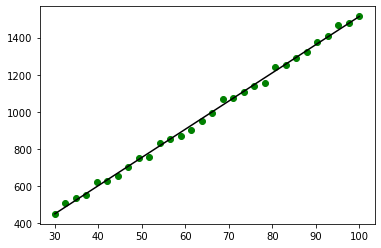

In [75]:
LR.plot_model()

[[753.49027134]]
[[1514.04481132]]
[[2274.59935131]]
[[15.2110908]]
[-7.06426865]


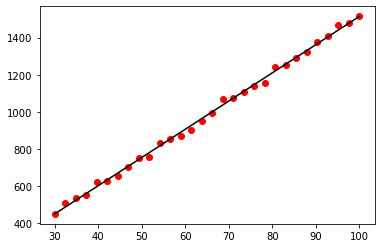

In [76]:
# Double check with sklearn:
from sklearn.linear_model import LinearRegression
X = np.array(data['Diện tích']).reshape(-1, 1)
Y = np.array(data["Giá"]).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
#reg.score(X, Y)
print(reg.predict(np.array([[50]])))
print(reg.predict(np.array([[100]])))
print(reg.predict(np.array([[150]])))
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X)
plt.scatter(X, Y, color ='r')
plt.plot(X, y_pred, color ='k')
  
plt.show()

### Ex 3.
Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [77]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_1 = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data_1.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


<AxesSubplot:>

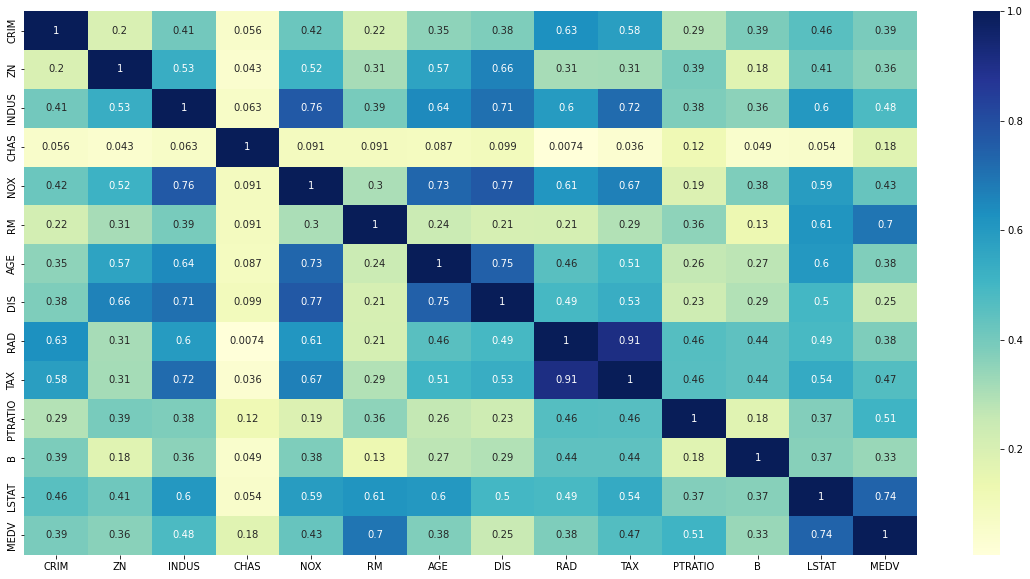

In [78]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_1.corr().abs(),  annot=True,cmap="YlGnBu")

The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.4 with MEDV which maybe a good indication of using as predictors. We may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX' features

In [79]:
X = np.matrix(np.array(data_1[["LSTAT", "INDUS", "RM", "TAX", "NOX", "PTRATIO"]]))
X

matrix([[  4.98 ,   2.31 ,   6.575, 296.   ,   0.538,  15.3  ],
        [  9.14 ,   7.07 ,   6.421, 242.   ,   0.469,  17.8  ],
        [  4.03 ,   7.07 ,   7.185, 242.   ,   0.469,  17.8  ],
        ...,
        [  5.64 ,  11.93 ,   6.976, 273.   ,   0.573,  21.   ],
        [  6.48 ,  11.93 ,   6.794, 273.   ,   0.573,  21.   ],
        [  7.88 ,  11.93 ,   6.03 , 273.   ,   0.573,  21.   ]])

In [80]:
X.shape

(506, 6)

In [81]:
Y = np.array(data_1["MEDV"]).reshape(-1, 1)
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [82]:
Y.shape

(506, 1)

In [83]:
MLR = LinearRegressionLR()

In [84]:
MLR.fit(X, Y)

In [85]:
MLR.coef()

matrix([[ 1.91458185e+01],
        [-5.45934588e-01],
        [ 8.71873392e-02],
        [ 4.65592779e+00],
        [-2.90110504e-03],
        [-3.40311735e+00],
        [-9.13819473e-01]])

In [86]:
MLR.plot_model()

Exception: This method is only used for simple LR.

In [ ]:
# Double check with sklearn:

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.6810217497396303

In [88]:
reg.coef_

array([[-5.45934588e-01,  8.71873392e-02,  4.65592779e+00,
        -2.90110504e-03, -3.40311735e+00, -9.13819473e-01]])

In [89]:
reg.intercept_

array([19.14581846])